In [4]:
more ../../planetas/pert50M01a3arch.f

In [6]:
cp ../../planetas/pert50M01a3arch.f .

In [26]:
import subprocess
import multiprocessing

def bash_command(cmd):
    p=subprocess.Popen(['/bin/bash', '-c', cmd])
    output, error = p.communicate()
    print output,error

In [11]:
bash_command('')

In [14]:
import multiprocessing

def worker():
    """worker function"""
    print 'Worker'
    return

if __name__ == '__main__':
    jobs = []
    for i in range(5):
        p = multiprocessing.Process(target=worker)
        jobs.append(p)
        p.start()

Worker
Worker
Worker
Worker
Worker
Worker


In [30]:

def worker(num):
    """thread worker function"""
    print 'Worker:', num
    return

if __name__ == '__main__':
    jobs = []
    for i in range(5):
        p = multiprocessing.Process(target=worker, args=(i,))
        jobs.append(p)
        p.start()

Worker
Worker
Worker: 0
Worker: 2
Worker: 3


In [32]:
jobs = []
for i in range(5):
    p = multiprocessing.Process(target=worker, args=(i,))
    jobs.append(p)
    p.start()

Worker: 2
Worker: 3
Worker: 4
Worker: 0
Worker: 1
Worker: 2
Worker: 3


In [15]:
bash_command('gedit multi.py &')

In [4]:
%timeit bash_command('python multi.py')

100 loops, best of 3: 4.1 ms per loop


In [19]:
%timeit bash_command('python multi.py')

100 loops, best of 3: 4.94 ms per loop


In [18]:
%timeit bash_command('python linear.py')

100 loops, best of 3: 2.47 ms per loop


In [5]:
bash_command('gedit linear.py &')

In [16]:
bash_command('python multi.py')

In [15]:
bash_command('python linear.py')

In [44]:
for i in range(100000000):
    i=i+1
print i

100000000


In [20]:
bash_command('gfortran -o analisis1 analisis1.f')

In [21]:
bash_command('./analisis1')

In [27]:
bash_command('gfortran -o analisis3 analisis3.f; ./analisis3')

None None


In [24]:
%%time

bash_command('gfortran -o analisis1 analisis1.f; ./analisis1')
bash_command('gfortran -o analisis2 analisis2.f; ./analisis2')
bash_command('gfortran -o analisis3 analisis3.f; ./analisis3')
bash_command('gfortran -o analisis4 analisis4.f; ./analisis4')

CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 10.8 ms


In [8]:
f = open('workfile', 'w')

In [16]:
f.write("sup")

In [17]:
f.close()

In [7]:


import fileinput
for line in fileinput.FileInput("sis_src.f",inplace=1):
    if line.rstrip():
        print line,



In [16]:
import fileinput
import numpy as np

identifier="0007"
#ac=58.23233 #44 AU
ac=30.
ms=1.
md=0.01

Apert=0.0
Fpert=0.3

gama=1.
cmigI=0.1

#metal=2.069580554962158E-002
metal=0.0
tgas=6859750.19


amin=ac*((7/4.-gama)/(2.-gama))**(1./(2-gama))
sigmag=(2.-gama)*md*2.e33/(2.*np.pi*(ac*1.5e13)**2.)
qc=1.24e5*(amin**(gama-7./4.))*(ac**(-gama))*(ms)*np.exp((amin/ac)**(2.-gama))/sigmag
print qc
Tfin="5.d7 "



f = open('sistemas%s.f'%identifier, 'w')
def myreplace(sline,sext,sfor,ffile,found):
    if(sline.find(sext)>=0):
        ffile.write(sline.replace(sext, sfor)),
        return found+1
    else:
        return found+0
for line in fileinput.input("sis_src.f", inplace=False):
    found=0
    found=myreplace(line,"$ArchivoSalida","\"resultados%s.txt\""%identifier,f,found)
    found=myreplace(line,"$Emed",str(md),f,found)
    found=myreplace(line,"$Rcar",str(ac),f,found)
    found=myreplace(line,"$Emestar",str(ms),f,found)
    found=myreplace(line,"$Qest",str(qc),f,found)    
    found=myreplace(line,"$Emetal",str(metal),f,found) # falta la metalicidad
    found=myreplace(line,"$Taugas",str(tgas),f,found) # falta el t de disipacion del gas
# Fijas    
    found=myreplace(line,"$Gama",str(gama),f,found)
    found=myreplace(line,"$ConstMigI",str(cmigI),f,found)
# Perturbacion
    found=myreplace(line,"$Apert",str(Apert),f,found)
    found=myreplace(line,"$Fpert",str(Fpert),f,found)
# Tiempo
    found=myreplace(line,"$Tfin",str(Tfin),f,found)

    if(found==0):
        
        f.write(line)
    # inside this loop the STDOUT will be redirected to the file
    # the comma after each print statement is needed to avoid double line breaks

#    if(line.find("$NombreArchivo")>=0):
#        f.write(line.replace("$NombreArchivo", "\"resultados%s.txt\""%identifier)),
#    else:
#        f.write(line)
#if(line.find("$Apert")>=0):
#        f.write(line.replace("$NombreArchivo", "\"resultados%s.txt\""%identifier)),
#    else:
#        f.write(line)
    
f.close()

53.8839349944


In [ ]:
identifier="0009"
#ac=58.23233 #44 AU
ac=30. # cambiar este de 30 a 100 según distrib
ms=1.
md=0.1

# Cambiar A = 0.0
# A = 0.1 f = 0.3
# A = 0.7 f = 1

Apert=0.7 
Fpert=1.

gama=1.
cmigI=0.1

#metal=2.069580554962158E-002
metal=0.0
tgas=6859750.19

Tfin=3.e7
Verb=True

createdotf(identifier,md,ac,ms,metal,tgas,gama,cmigI,Apert,Fpert,Tfin,Verb)

In [11]:
########################################
# create input data file
# input.py
########################################
# already live
########################################
import numpy as np

#ac=30. # cambiar este de 30 a 100 según distrib
ms=1.
md=0.1

# Cambiar A = 0.0
# A = 0.1 f = 0.3
# A = 0.7 f = 1

Apert=0.7 
Fpert=1.

gama=1.
cmigI=0.1

#metal=2.069580554962158E-002
metal=0.0
tgas=6859750.19

Tfin=2.1e7
Verb=False

acvals=np.linspace(20,50,10)

f = open('parameters.in', 'w')
f.write("md,ac,ms,metal,tgas,gama,cmigI,Apert,Fpert,Tfin,Verb\n") 
for ac in acvals:
    amin=ac*((7/4.-gama)/(2.-gama))**(1./(2-gama))
    sigmag=(2.-gama)*md*2.e33/(2.*np.pi*(ac*1.5e13)**2.)
    qc=1.24e5*(amin**(gama-7./4.))*(ac**(-gama))*(ms)*np.exp((amin/ac)**(2.-gama))/sigmag
    if(qc>1):
        f.write('%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n'%(md,ac,ms,metal,tgas,gama,cmigI,Apert,Fpert,Tfin,Verb)) 
f.close()
    
    


In [32]:
######################################
# MAIN PROGRAM
# creates compilable FORTRAN code
# based on parameter.in and sis_src.f
# compiles and executes it in parallel
######################################

import fileinput
import numpy as np
import pandas as pd
import os
import subprocess
from multiprocessing.dummy import Pool as ThreadPool

######################################
# executes bash commands and 
# communicates output (None,None)
######################################
def bash_command(cmd):
    p=subprocess.Popen(['/bin/bash', '-c', cmd])
    print p.communicate()


######################################
# converts numeric values to fortran's
# double precision format
######################################
def givedouble(var):
    return ("%.1e"%var).replace("e","d")

#####################################
# replaces text inline for a specific
# search string (sext->sfor) in ffile
#####################################
def myreplace(sline,sext,sfor,ffile,found):
    if(sline.find(sext)>=0):
        ffile.write(sline.replace(sext, sfor)),
        return found+1
    else:
        return found+0

######################################
# creates compilable fortran code from
# the source code in sis_src.f and our
# input parameters passed by the main
# program but generated by input.py
######################################
def createdotf(pars):
    identifier,fname,fstring,md,ac,ms,metal,tgas,gama,cmigI,Apert,Fpert,Tfin,Verb = pars

# calculates toomre q (stability criterion is q>1)
    amin=ac*((7/4.-gama)/(2.-gama))**(1./(2-gama))
    sigmag=(2.-gama)*md*2.e33/(2.*np.pi*(ac*1.5e13)**2.)
    qc=1.24e5*(amin**(gama-7./4.))*(ac**(-gama))*(ms)*np.exp((amin/ac)**(2.-gama))/sigmag
# convert input to fortran formatting
    cmigI=givedouble(cmigI)
    Fpert=givedouble(Fpert)
    md=givedouble(md)
    Tfin=givedouble(Tfin)
    Verb=".%s."%str(Verb).upper()
# checks for disk stability, it shouldn't be a problem if parameter.in is obtained from input.py   
    if(qc >= 1.):
        f = open(fstring+fname+'%s.f'%identifier, 'w')
        for line in fileinput.input("sis_src.f", inplace=False):
            found=0
    # output filenames (do not change, rescortos is called by pastefiles.sh):
    # resultados - log time evolution (only when verbose=true)
    # rescortos - default results
    # gigantes - info for giant planet formation
            found=myreplace(line,"$ArchivoSalida","\""+fstring+"resultados%s.txt\""%identifier,f,found)
            found=myreplace(line,"$SalidaCorta","\""+fstring+"rescortos%s.txt\""%identifier,f,found)
            found=myreplace(line,"$Gigantes","\""+fstring+"gigantes%s.txt\""%identifier,f,found)
    # simulation parameters:
    # disk mass
    # characteristic radius (disk)
    # stellar mass
    # toomre q parameter
    # metallicity
    # gas dissipation timescale
            found=myreplace(line,"$Emed",str(md),f,found)
            found=myreplace(line,"$Rcar",str(ac),f,found)
            found=myreplace(line,"$Emestar",str(ms),f,found)
            found=myreplace(line,"$Qest",str(qc),f,found)    
            found=myreplace(line,"$Emetal",str(metal),f,found) 
            found=myreplace(line,"$Taugas",str(tgas),f,found) 
    # sort-of-fixed parameters:
    # power law profile for surface density
    # type I migration parameter
            found=myreplace(line,"$Gama",str(gama),f,found)
            found=myreplace(line,"$ConstMigI",str(cmigI),f,found)
    # perturbation parameters:
    # amplitude
    # length scale
            found=myreplace(line,"$Apert",str(Apert),f,found)
            found=myreplace(line,"$Fpert",str(Fpert),f,found)
    # simulation timescale
            found=myreplace(line,"$Tfin",str(Tfin),f,found)
    # true for verbose output (log-time evolution)        
            found=myreplace(line,"$Verb",str(Verb),f,found)
    # add identifier to output
            found=myreplace(line,"$Identifier",str(identifier),f,found)
            if(found==0):
                f.write(line)
        f.close()
# writes simulation parameters into info file    
    finfo = open(fstring+'info%s.txt'%identifier, 'w')
    firstline="%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s\n\n" % (identifier,md,ac,ms,metal,tgas,gama,cmigI,Apert,Fpert,Tfin,Verb)
    finfo.write(firstline)
    finfo.write("Identifier...............................%s\n"%identifier)
    finfo.write("Disk Mass (M_sun)........................%s\n"%md)
    finfo.write("Critical Radius (AU).....................%s\n"%ac)
    finfo.write("Stellar Mass (M_sun).....................%s\n"%ms)
    finfo.write("Metallicity (log Fe/H)_*/(log Fe/H)_sun..%s\n"%metal)
    finfo.write("Gas depletion timescale (yr).............%s\n"%tgas)
    finfo.write("Gamma (density profile power law)........%s\n"%gama)
    finfo.write("Type I Migration Coefficient.............%s\n"%cmigI)
    finfo.write("Perturbation Amplitude...................%s\n"%Apert)
    finfo.write("Perturbation length scale................%s\n"%Fpert)
    finfo.write("Simulation timescale (yr)................%s\n"%Tfin)
    finfo.write("Verbose results?.........................%s\n"%Verb)
    finfo.write("Toomre Q.................................%s\n"%qc)
    finfo.close()
    
#   reads from parameter.in, which should be generated from input.py
df=pd.read_csv('parameters.in')

cstring1 = 'gfortran -o' # compiler+flags
fname = 'qsistemas' # file names
cstring3 = '.f; ./' # extensions (do not change)
fstring  = 'results/' # folder for .f sources, executables and results (do not change, req. by pastefiles.sh)

# creates work folder
if not os.path.exists(fstring):
    os.makedirs(fstring)

nsys=len(df) # number of simulations
myfill=int(np.log10(nsys)+1) # with zfill, generate identifier for each simulation
lidr=[]
inst=[]
for icoun in range(nsys):
    idr=str(icoun).zfill(myfill)
    pars=tuple([idr]+[fname]+[fstring]+df.iloc[icoun].values.tolist()) # parameters for createdotf function
    createdotf(pars)
    pname=fname+idr    
    inst.append(cstring1+2*(' '+fstring+pname)+cstring3+fstring+pname) # generate instructions for bash_command function
    
# create header for csv (do not change filename, req. by pastefiles.sh)
hfile=open(fstring+'header.txt', 'w')
hfile.write('ident,it,t,a(i),emegas(i),emepla(i)/emet,rplanet(i)/radtie,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas\n') 
hfile.close()

# parallel parsing of instructions (compile+execute from synthetic .f sources) to pool of workers
pool = ThreadPool(3)
results=pool.map(bash_command,inst)
pool.close()
pool.join()

# open parameters in sis_src.f:
# lsnr : number of log time snapshots for verbose output (500 yields about 2-5 MB)
# dt: timestep in years (default to 100)

# todo:
# perturbation only works for the dust - maybe add gas perturbation?
# gas envelope is automatically dissipated after a collision (look for eme1 and eme2) - modulate better?
# make a verbose option for giant planets
# resultados files go up tfin in parameters.in, but if verbose=false this is overkill (curb tfin to 101% in src?)
# auto check empty files and communicate in paste bash script

# bugs:
# not so much a bug, but old input is not trustworthy, as the q condition was not calculated properly
# i for kk in planet dissapearance when w > wcrit, caused whole systems to disappear due to bad indexing
# massive removal of runtime errors due to segfaults (april '16)

# notes:
## an empty rescortos file (quite possibly) happens because of migration + collisions (loss of env) + dissasembly due to high L
#  when this happens, check gigantes file for giant planet formation + migration
## sis_src outputs at 2e7 yr for rescortos by default
## compiler options for segfault debugging w gdb: gfortran -g -fbacktrace -ffpe-trap=zero,overflow,underflow sistemasII.f 


(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)


In [13]:
inst

['gfortran -o results/qsistemas00 results/qsistemas00.f; ./results/qsistemas00',
 'gfortran -o results/qsistemas01 results/qsistemas01.f; ./results/qsistemas01',
 'gfortran -o results/qsistemas02 results/qsistemas02.f; ./results/qsistemas02',
 'gfortran -o results/qsistemas03 results/qsistemas03.f; ./results/qsistemas03',
 'gfortran -o results/qsistemas04 results/qsistemas04.f; ./results/qsistemas04',
 'gfortran -o results/qsistemas05 results/qsistemas05.f; ./results/qsistemas05',
 'gfortran -o results/qsistemas06 results/qsistemas06.f; ./results/qsistemas06',
 'gfortran -o results/qsistemas07 results/qsistemas07.f; ./results/qsistemas07',
 'gfortran -o results/qsistemas08 results/qsistemas08.f; ./results/qsistemas08',
 'gfortran -o results/qsistemas09 results/qsistemas09.f; ./results/qsistemas09']

In [15]:
from multiprocessing import cpu_count
cpu_count()

8

In [27]:
df=pd.read_csv("results/rescortos00.txt",names=['ident','it','t','a(i)','emegas(i)','emepla(i)/emet', 'rplanet(i)/radtie','emestar','rc','qest','sigmag_0', 'emed','gama','apert','fpert','constmigI','emetal','taugas'])

In [3]:
import pandas as pd
dfr=pd.read_csv("finalresults.csv")

In [4]:
dfr.head()

,ident,it,t,a(i),emegas(i),emepla(i)/emet,rplanet(i)/radtie,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
0,0,199400,20000001.0,3.738329,0.0,3.319078,2.2939688215994427,1.592302e+33,58.23233,5.017441,41.719517,0.1,1.0,0.0,1.0,0.1,0.020696,6859750.0
1,0,199400,20000001.0,5.699879,0.0,2.567223,2.1067245627859990,1.592302e+33,58.23233,5.017441,41.719517,0.1,1.0,0.0,1.0,0.1,0.020696,6859750.0
2,0,199400,20000001.0,7.993052,0.0,1.427370,1.7330081096503582,1.592302e+33,58.23233,5.017441,41.719517,0.1,1.0,0.0,1.0,0.1,0.020696,6859750.0
3,0,199400,20000001.0,9.694654,0.0,1.085355,1.5823793674824944,1.592302e+33,58.23233,5.017441,41.719517,0.1,1.0,0.0,1.0,0.1,0.020696,6859750.0
4,0,199400,20000001.0,10.925776,0.0,0.908518,1.4914329559574093,1.592302e+33,58.23233,5.017441,41.719517,0.1,1.0,0.0,1.0,0.1,0.020696,6859750.0


In [6]:
len(np.unique(dfr.ident))

660

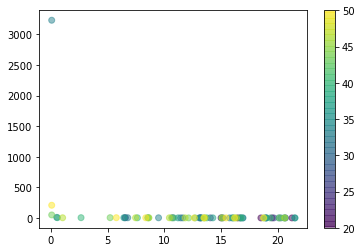

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(dfr['a(i)'],dfr['emepla(i)/emet'],c=dfr.rc,alpha=0.5)
plt.colorbar()
plt.show()

# For creating .f only

In [1]:
######################################
# MAIN PROGRAM
# creates compilable FORTRAN code
# based on parameter.in and sis_src.f
# compiles and executes it in parallel
######################################

import fileinput
import numpy as np
import pandas as pd
import os
import subprocess
from multiprocessing.dummy import Pool as ThreadPool

######################################
# executes bash commands and 
# communicates output (None,None)
######################################
def bash_command(cmd):
    p=subprocess.Popen(['/bin/bash', '-c', cmd])
    print p.communicate()


######################################
# converts numeric values to fortran's
# double precision format
######################################
def givedouble(var):
    return ("%.1e"%var).replace("e","d")

#####################################
# replaces text inline for a specific
# search string (sext->sfor) in ffile
#####################################
def myreplace(sline,sext,sfor,ffile,found):
    if(sline.find(sext)>=0):
        ffile.write(sline.replace(sext, sfor)),
        return found+1
    else:
        return found+0

######################################
# creates compilable fortran code from
# the source code in sis_src.f and our
# input parameters passed by the main
# program but generated by input.py
######################################
def createdotf(pars):
    identifier,fname,fstring,md,ac,ms,metal,tgas,gama,cmigI,Apert,Fpert,Tfin,Verb = pars

# calculates toomre q (stability criterion is q>1)
    amin=ac*((7/4.-gama)/(2.-gama))**(1./(2-gama))
    sigmag=(2.-gama)*md*2.e33/(2.*np.pi*(ac*1.5e13)**2.)
    qc=1.24e5*(amin**(gama-7./4.))*(ac**(-gama))*(ms)*np.exp((amin/ac)**(2.-gama))/sigmag
# convert input to fortran formatting
    cmigI=givedouble(cmigI)
    Fpert=givedouble(Fpert)
    md=givedouble(md)
    Tfin=givedouble(Tfin)
    Verb=".%s."%str(Verb).upper()
# checks for disk stability, it shouldn't be a problem if parameter.in is obtained from input.py   
    if(qc >= 1.):
        f = open(fstring+fname+'%s.f'%identifier, 'w')
        for line in fileinput.input("sis_src.f", inplace=False):
            found=0
    # output filenames (do not change, rescortos is called by pastefiles.sh):
    # resultados - log time evolution (only when verbose=true)
    # rescortos - default results
    # gigantes - info for giant planet formation
            found=myreplace(line,"$ArchivoSalida","\""+fstring+"resultados%s.txt\""%identifier,f,found)
            found=myreplace(line,"$SalidaCorta","\""+fstring+"rescortos%s.txt\""%identifier,f,found)
            found=myreplace(line,"$Gigantes","\""+fstring+"gigantes%s.txt\""%identifier,f,found)
    # simulation parameters:
    # disk mass
    # characteristic radius (disk)
    # stellar mass
    # toomre q parameter
    # metallicity
    # gas dissipation timescale
            found=myreplace(line,"$Emed",str(md),f,found)
            found=myreplace(line,"$Rcar",str(ac),f,found)
            found=myreplace(line,"$Emestar",str(ms),f,found)
            found=myreplace(line,"$Qest",str(qc),f,found)    
            found=myreplace(line,"$Emetal",str(metal),f,found) 
            found=myreplace(line,"$Taugas",str(tgas),f,found) 
    # sort-of-fixed parameters:
    # power law profile for surface density
    # type I migration parameter
            found=myreplace(line,"$Gama",str(gama),f,found)
            found=myreplace(line,"$ConstMigI",str(cmigI),f,found)
    # perturbation parameters:
    # amplitude
    # length scale
            found=myreplace(line,"$Apert",str(Apert),f,found)
            found=myreplace(line,"$Fpert",str(Fpert),f,found)
    # simulation timescale
            found=myreplace(line,"$Tfin",str(Tfin),f,found)
    # true for verbose output (log-time evolution)        
            found=myreplace(line,"$Verb",str(Verb),f,found)
    # add identifier to output
            found=myreplace(line,"$Identifier",str(identifier),f,found)
            if(found==0):
                f.write(line)
        f.close()
# writes simulation parameters into info file    
    finfo = open(fstring+'info%s.txt'%identifier, 'w')
    firstline="%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s\n\n" % (identifier,md,ac,ms,metal,tgas,gama,cmigI,Apert,Fpert,Tfin,Verb)
    finfo.write(firstline)
    finfo.write("Identifier...............................%s\n"%identifier)
    finfo.write("Disk Mass (M_sun)........................%s\n"%md)
    finfo.write("Critical Radius (AU).....................%s\n"%ac)
    finfo.write("Stellar Mass (M_sun).....................%s\n"%ms)
    finfo.write("Metallicity (log Fe/H)_*/(log Fe/H)_sun..%s\n"%metal)
    finfo.write("Gas depletion timescale (yr).............%s\n"%tgas)
    finfo.write("Gamma (density profile power law)........%s\n"%gama)
    finfo.write("Type I Migration Coefficient.............%s\n"%cmigI)
    finfo.write("Perturbation Amplitude...................%s\n"%Apert)
    finfo.write("Perturbation length scale................%s\n"%Fpert)
    finfo.write("Simulation timescale (yr)................%s\n"%Tfin)
    finfo.write("Verbose results?.........................%s\n"%Verb)
    finfo.write("Toomre Q.................................%s\n"%qc)
    finfo.close()
    
#   reads from parameter.in, which should be generated from input.py
df=pd.read_csv('parameters.in')

cstring1 = 'gfortran -o' # compiler+flags
fname = 'qsistemas' # file names
cstring3 = '.f; ./' # extensions (do not change)
fstring  = 'results/' # folder for .f sources, executables and results (do not change, req. by pastefiles.sh)

# creates work folder
if not os.path.exists(fstring):
    os.makedirs(fstring)

nsys=len(df) # number of simulations
myfill=int(np.log10(nsys)+1) # with zfill, generate identifier for each simulation
lidr=[]
inst=[]
for icoun in range(nsys):
    idr=str(icoun).zfill(myfill)
    pars=tuple([idr]+[fname]+[fstring]+df.iloc[icoun].values.tolist()) # parameters for createdotf function
    createdotf(pars)
    pname=fname+idr    
    inst.append(cstring1+2*(' '+fstring+pname)+cstring3+fstring+pname) # generate instructions for bash_command function



In [2]:
inst[127]

'gfortran -o results/qsistemas0127 results/qsistemas0127.f; ./results/qsistemas0127'

In [ ]:
df

In [8]:
fin=np.loadtxt("finished.txt")

In [9]:
tot=np.loadtxt("totalsims.txt")

In [10]:
cre=np.loadtxt("createdfiles.txt")

In [9]:
cre_f="createdfiles.txt"

In [17]:
rname="yamrun"
"ls "+rname+".o* | xargs cat | grep -o -P  \".{0,31}run\" | sort -n | awk '{print $1}' | uniq > "+fin_f

'ls yamrun.o* | xargs cat | grep -o -P  ".{0,31}run" | sort -n | awk \'{print $1}\' | uniq >finished.txt'

In [5]:
# Quick code for evaluating quality of simulations
import numpy as np
import subprocess
import sys

def bash_command(cmd):
    p=subprocess.Popen(['/bin/bash', '-c', cmd])
    print p.communicate()

rname=str(sys.argv[0])    
cre_f="createdfiles.txt"
cre_cmd="ls -lt results/rescortos* | tac | awk '{print $9" " $5}' | cut -c18- | sort -n | sed s/\".txt\"//g > "+cre_f
tot_f="totalsims.txt"
tot_cmd="ls results/info* | xargs -n1 | cut -c13- | sed s/\".txt\"// > "+tot_f
fin_f="finished.txt"
fin_cmd="ls "+rname+".o* | xargs cat | grep -o -P  \".{0,31}run\" | sort -n | awk '{print $1}' | uniq > "+fin_f
bash_command(cre_f)
bash_command(tot_cmd)
bash_command(fin_f)


cre=np.loadtxt(cre_f)
tot=np.loadtxt(tot_f)
fin=np.loadtxt(fin_f)
print "*****************************"
print "Planned simulations = "+str(tot.shape[0])
print "Saved to "+tot_f
print "*****************************"
ne=tot[np.logical_not(np.in1d(tot,cre[:,0]))] # not executed
ne_f="notexec.txt"
np.savetxt(ne_f,ne,fmt="%4i")
print "Not executed (interrupted) = "+str(ne.shape[0])
print "Saved to "+ne_f
print "*****************************"
ioe=cre[np.logical_not(np.in1d(cre[:,0],fin))][:,0] # executed but not finished - interrupted or error
ioe_f="intorerr.txt"
np.savetxt(ioe_f,ioe,fmt="%4i")
print "Executed but interrupted (or error) = "+str(ioe.shape[0])
print "Saved to "+ioe_f
print "*****************************"
print "Successful simulations (finished) = "+str(fin.shape[0])
print "Saved to "+fin_f
print "*****************************"
print "Sanity check, PS=NE+IE+FS: "+str(tot.shape[0])+" = "+str(ne.shape[0]+ioe.shape[0]+fin.shape[0])
print "*****************************"
ef=cre[cre[:,1]==0][:,0] # empty files
fs=ef[np.logical_not(np.in1d(ef,ioe))] # failed systems
fs_f="failedsys.txt"
np.savetxt(fs_f,fs,fmt="%4i")
print "Failed systems (no planets formed) = "+str(fs.shape[0])
print "Saved to "+fs_f
print "*****************************"


*****************************
Planned simulations = 1084
Saved to totalsims.txt
*****************************
Not executed (interrupted) = 176
Saved to notexec.txt
*****************************
Executed but interrupted (or error) = 38
Saved to intorerr.txt
*****************************
Successful simulations (finished) = 870
Saved to finished.txt
*****************************
Sanity check, PS=NE+IE+FS: 1084 = 1084
*****************************
Failed systems (no planets formed) = 9
Saved to failedsys.txt
*****************************


In [1]:
######################################
# MAIN PROGRAM
# creates compilable FORTRAN code
# based on parameter.in and sis_src.f
# compiles and executes it in parallel
######################################

import fileinput
import numpy as np
import pandas as pd
import os
import subprocess
from multiprocessing.dummy import Pool as ThreadPool

######################################
# executes bash commands and 
# communicates output (None,None)
######################################
def bash_command(cmd):
    p=subprocess.Popen(['/bin/bash', '-c', cmd],stderr=subprocess.PIPE)
    print p.communicate(),cmd

######################################
# converts numeric values to fortran's
# double precision format
######################################
def givedouble(var):
    return ("%.1e"%var).replace("e","d")

#####################################
# replaces text inline for a specific
# search string (sext->sfor) in ffile
#####################################
def myreplace(sline,sext,sfor,ffile,found):
    if(sline.find(sext)>=0):
        ffile.write(sline.replace(sext, sfor)),
        return found+1
    else:
        return found+0

######################################
# creates compilable fortran code from
# the source code in sis_src.f and our
# input parameters passed by the main
# program but generated by input.py
######################################
def createdotf(pars):
    identifier,fname,fstring,md,ac,ms,metal,tgas,gama,cmigI,Apert,Fpert,Tfin,Verb = pars

# calculates toomre q (stability criterion is q>1)
    amin=ac*((7/4.-gama)/(2.-gama))**(1./(2-gama))
    sigmag=(2.-gama)*md*2.e33/(2.*np.pi*(ac*1.5e13)**2.)
    qc=1.24e5*(amin**(gama-7./4.))*(ac**(-gama))*(ms)*np.exp((amin/ac)**(2.-gama))/sigmag
# convert input to fortran formatting
    cmigI=givedouble(cmigI)
    Fpert=givedouble(Fpert)
    md=givedouble(md)
    Tfin=givedouble(Tfin)
    Verb=".%s."%str(Verb).upper()
# checks for disk stability, it shouldn't be a problem if parameter.in is obtained from input.py   
    if(qc >= 1.):
        f = open(fstring+fname+'%s.f'%identifier, 'w')
        for line in fileinput.input("sis_src.f", inplace=False):
            found=0
    # output filenames (do not change, rescortos is called by pastefiles.sh):
    # resultados - log time evolution (only when verbose=true)
    # rescortos - default results
    # gigantes - info for giant planet formation
            found=myreplace(line,"$ArchivoSalida","\""+fstring+"resultados%s.txt\""%identifier,f,found)
            found=myreplace(line,"$SalidaCorta","\""+fstring+"rescortos%s.txt\""%identifier,f,found)
            found=myreplace(line,"$Gigantes","\""+fstring+"gigantes%s.txt\""%identifier,f,found)
    # simulation parameters:
    # disk mass
    # characteristic radius (disk)
    # stellar mass
    # toomre q parameter
    # metallicity
    # gas dissipation timescale
            found=myreplace(line,"$Emed",str(md),f,found)
            found=myreplace(line,"$Rcar",str(ac),f,found)
            found=myreplace(line,"$Emestar",str(ms),f,found)
            found=myreplace(line,"$Qest",str(qc),f,found)    
            found=myreplace(line,"$Emetal",str(metal),f,found) 
            found=myreplace(line,"$Taugas",str(tgas),f,found) 
    # sort-of-fixed parameters:
    # power law profile for surface density
    # type I migration parameter
            found=myreplace(line,"$Gama",str(gama),f,found)
            found=myreplace(line,"$ConstMigI",str(cmigI),f,found)
    # perturbation parameters:
    # amplitude
    # length scale
            found=myreplace(line,"$Apert",str(Apert),f,found)
            found=myreplace(line,"$Fpert",str(Fpert),f,found)
    # simulation timescale
            found=myreplace(line,"$Tfin",str(Tfin),f,found)
    # true for verbose output (log-time evolution)        
            found=myreplace(line,"$Verb",str(Verb),f,found)
    # add identifier to output
            found=myreplace(line,"$Identifier",str(identifier),f,found)
            if(found==0):
                f.write(line)
        f.close()
# writes simulation parameters into info file    
    finfo = open(fstring+'info%s.txt'%identifier, 'w')
    firstline="%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s\n\n" % (identifier,md,ac,ms,metal,tgas,gama,cmigI,Apert,Fpert,Tfin,Verb)
    finfo.write(firstline)
    finfo.write("Identifier...............................%s\n"%identifier)
    finfo.write("Disk Mass (M_sun)........................%s\n"%md)
    finfo.write("Critical Radius (AU).....................%s\n"%ac)
    finfo.write("Stellar Mass (M_sun).....................%s\n"%ms)
    finfo.write("Metallicity (log Fe/H)_*/(log Fe/H)_sun..%s\n"%metal)
    finfo.write("Gas depletion timescale (yr).............%s\n"%tgas)
    finfo.write("Gamma (density profile power law)........%s\n"%gama)
    finfo.write("Type I Migration Coefficient.............%s\n"%cmigI)
    finfo.write("Perturbation Amplitude...................%s\n"%Apert)
    finfo.write("Perturbation length scale................%s\n"%Fpert)
    finfo.write("Simulation timescale (yr)................%s\n"%Tfin)
    finfo.write("Verbose results?.........................%s\n"%Verb)
    finfo.write("Toomre Q.................................%s\n"%qc)
    finfo.close()
    
#   reads from parameter.in, which should be generated from input.py
df=pd.read_csv('parameters.in')

cstring1 = 'gfortran -o' # compiler+flags
fname = 'qsistemas' # file names
cstring3 = '.f; ./' # extensions (do not change)
fstring  = 'results/' # folder for .f sources, executables and results (do not change, req. by pastefiles.sh)

# creates work folder
if not os.path.exists(fstring):
    os.makedirs(fstring)

nsys=len(df) # number of simulations
myfill=int(np.log10(nsys)+1) # with zfill, generate identifier for each simulation
lidr=[]
inst=[]
for icoun in range(nsys):
    idr=str(icoun).zfill(myfill)
    pars=tuple([idr]+[fname]+[fstring]+df.iloc[icoun].values.tolist()) # parameters for createdotf function
    createdotf(pars)
    pname=fname+idr    
    inst.append(cstring1+2*(' '+fstring+pname)+cstring3+fstring+pname) # generate instructions for bash_command function
    
# create header for csv (do not change filename, req. by pastefiles.sh)
hfile=open(fstring+'header.txt', 'w')
hfile.write('ident,it,t,a(i),emegas(i),emepla(i)/emet,rplanet(i)/radtie,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas\n') 
hfile.close()



# open parameters in sis_src.f:
# lsnr : number of log time snapshots for verbose output (500 yields about 2-5 MB)
# dt: timestep in years (default to 100)

# todo:
# perturbation only works for the dust - maybe add gas perturbation?
# gas envelope is automatically dissipated after a collision (look for eme1 and eme2) - modulate better?
# make a verbose option for giant planets
# resultados files go up tfin in parameters.in, but if verbose=false this is overkill (curb tfin to 101% in src?)
# auto check empty files and communicate in paste bash script

# bugs:
# not so much a bug, but old input is not trustworthy, as the q condition was not calculated properly
# i for kk in planet dissapearance when w > wcrit, caused whole systems to disappear due to bad indexing
# massive removal of runtime errors due to segfaults (april '16)

# notes:
## an empty rescortos file (quite possibly) happens because of migration + collisions (loss of env) + dissasembly due to high L
#  when this happens, check gigantes file for giant planet formation + migration
## sis_src outputs at 2e7 yr for rescortos by default



In [2]:
inst

['gfortran -o results/qsistemas0 results/qsistemas0.f; ./results/qsistemas0']

In [ ]:
# parallel parsing of instructions (compile+execute from synthetic .f sources) to pool of workers
pool = ThreadPool(5)
results=pool.map(bash_command,inst)
pool.close()
pool.join()